# 3.2 Open Exploration with 17 Objectives

In [1]:
# load library

import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import time
import statistics

from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, 
                           ema_logging, Constant, Scenario, Policy)
from ema_workbench import load_results
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities

ema_logging.log_to_stderr(ema_logging.INFO)

C:\Users\na0e2\Miniconda3\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)


<Logger EMA (DEBUG)>

In [5]:
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation

results = utilities.load_results('results/base_case_75.csv')

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_75.csv


In [6]:
experiments, outcomes = results
outcomes = pd.DataFrame(outcomes)
experiments = pd.DataFrame(experiments)

results = experiments.join(outcomes)
results = results.drop(columns="model")
results

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,22.0,316.720229,1.5,0.508918,179.556360,1.0,0.056675,161.786225,1.0,0.411000,...,2.711919e+07,0.000000,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000
1,37.0,48.449390,1.5,0.726517,71.388513,1.0,0.316716,140.869331,10.0,0.288527,...,2.711919e+07,0.000000,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000
2,116.0,342.466577,1.5,0.696968,164.240184,10.0,0.070253,241.641985,10.0,0.701739,...,2.711919e+07,0.000000,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000
3,131.0,317.750054,10.0,0.514734,41.084696,10.0,0.670645,172.060501,1.5,0.002929,...,2.711919e+07,0.002314,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,568.536776
4,69.0,134.031006,1.0,0.056991,141.114722,10.0,0.138095,275.399627,1.0,0.807559,...,2.711919e+07,0.000000,0.0,3.050733e+07,0.0,0.0,9.630148e+07,0.0,492600000.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,23.0,151.955766,10.0,0.943525,149.089915,1.5,0.594206,270.182770,1.5,0.089715,...,4.543895e+07,0.000000,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000
74996,39.0,224.496227,1.0,0.390712,243.949795,1.0,0.090980,310.542851,1.5,0.569246,...,4.543895e+07,0.000000,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000
74997,45.0,347.284444,1.0,0.687342,59.820104,1.0,0.659417,229.083131,1.0,0.643934,...,4.543895e+07,0.000000,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000
74998,124.0,106.585076,1.0,0.434781,132.822331,10.0,0.266128,170.757239,10.0,0.151776,...,4.543895e+07,0.000000,0.0,2.667073e+07,0.0,0.0,5.525012e+07,0.0,679700000.0,0.000000


In [7]:
base_results = utilities.load_results('results/base_case_without_policy.csv')

base_experiments, base_outcomes = base_results
base_outcomes = pd.DataFrame(base_outcomes)
base_experiments = pd.DataFrame(base_experiments)

base_results = base_experiments.join(base_outcomes)
base_results = base_results.drop(columns="model")
base_results

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_without_policy.csv


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_Dike Investment Costs 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Dike Investment Costs 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2
0,62.0,84.997178,1.0,0.957652,302.697759,1.0,0.712827,133.589414,1.0,0.238457,...,0,0.662632,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
1,3.0,345.623637,1.0,0.483549,166.050246,10.0,0.286214,79.130315,1.5,0.080464,...,0,1.092732,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
2,130.0,193.012997,1.5,0.653016,224.624180,10.0,0.349210,217.541726,1.5,0.063713,...,0,1.077036,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
3,6.0,115.440169,1.0,0.696211,183.928033,10.0,0.841538,153.686659,10.0,0.919403,...,0,0.023142,2.423024e+06,0,0.001621,3.321234e+07,0,0.037189,0.0,0.0
4,30.0,346.490014,1.0,0.441742,294.524107,1.0,0.485913,313.654161,1.5,0.915752,...,0,0.000000,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,27.0,231.934052,1.0,0.896620,269.749043,10.0,0.410018,260.800822,1.0,0.638854,...,0,0.004116,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
996,101.0,326.634235,1.5,0.384356,218.039156,10.0,0.453245,296.384211,1.0,0.581751,...,0,0.000000,0.000000e+00,0,0.000000,1.078552e+08,0,0.068980,0.0,0.0
997,130.0,330.657857,1.5,0.744546,255.491556,1.5,0.202691,167.968988,10.0,0.161231,...,0,0.829496,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0
998,113.0,347.754397,1.5,0.699881,57.640404,1.5,0.561584,205.719905,1.0,0.344590,...,0,0.286528,0.000000e+00,0,0.000000,0.000000e+00,0,0.000000,0.0,0.0


In [8]:
dike_lists = ['A.1', 'A.2', 'A.3', 'A.4', 'A.5']

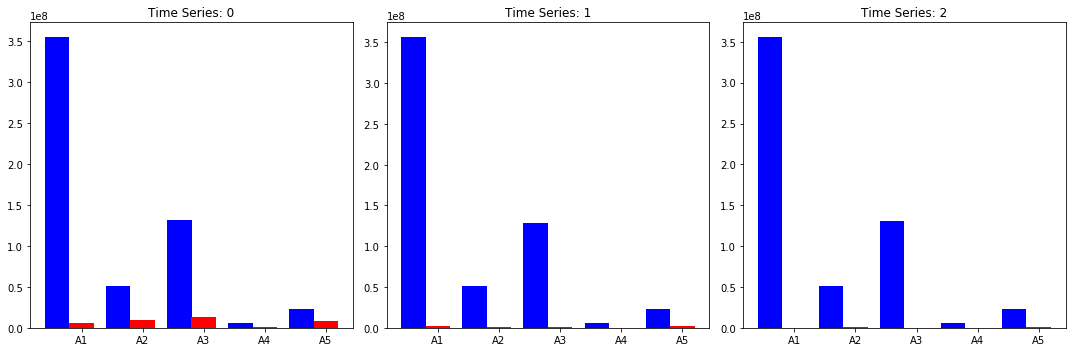

[[355125182.61733544, 50715999.84645771, 132122001.79553422, 5888394.024567844, 23066239.240156006], [356677389.3222748, 51322983.844300754, 128138638.57111664, 5914134.02125824, 23620981.79066198], [355922400.5782887, 51594901.78099206, 130599565.90792029, 5724818.063779456, 22971501.38923983]]


In [150]:
#mean value of expected annual damage of each dike per time serires
N = 5
ind = np.arange(5)  # the x locations for the groups
width = 0.4
base_damage = []
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    damage_list_75 = []
    base_damage_list = []
    base_damage_list_75 = []
    
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Annual Damage "+str(n)].mean())
        damage_list_75.append(results[str(i) + "_Expected Annual Damage "+str(n)].quantile(0.75))
        
    for i in dike_lists:
        base_damage_list.append(base_results[str(i) + "_Expected Annual Damage "+str(n)].mean())
        base_damage_list_75.append(base_results[str(i) + "_Expected Annual Damage "+str(n)].quantile(0.75))
        
    #damage = pd.DataFrame([damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
    #base_damage = pd.DataFrame([base_damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
    
    base_damage.append(base_damage_list)
    
    #a.bar(dike_lists, (damage_list,base_damage_list), color = 'red')
    a.bar(ind, base_damage_list, width, color = 'blue')
    a.bar(ind+width, damage_list, width, color = 'red')
    
    a.set_xticks(ind+width)
    a.set_xticklabels( ('A1', 'A2', 'A3', 'A4', 'A5') )
    #a.plot(damage_list_75, color = 'blue')
    #a.plot(base_damage_list_75, color = 'blue')

    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()
print(base_damage)

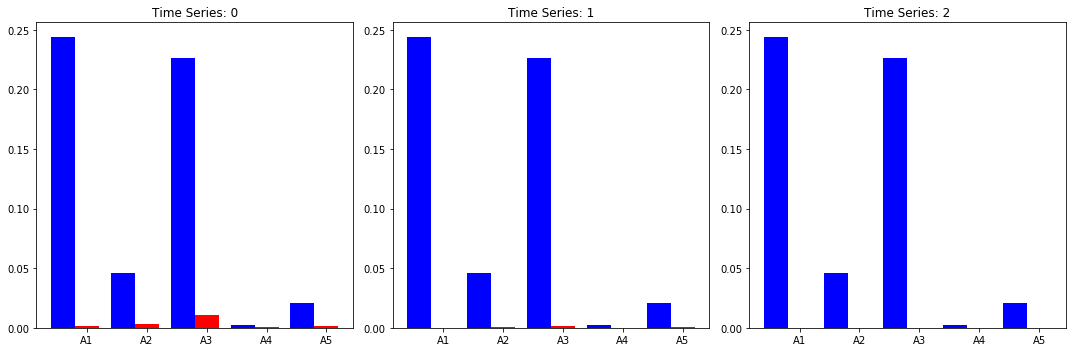

[[0.24410375180259933, 0.04593145092856825, 0.22664886664165118, 0.0025775558229184747, 0.020760454665878662], [0.24410375180259933, 0.04593145092856825, 0.22664886664165118, 0.0025775558229184747, 0.020760454665878662], [0.24410375180259933, 0.04593145092856825, 0.22664886664165118, 0.0025775558229184747, 0.020760454665878662]]


In [151]:
#mean value of Expected Number of Deaths of each dike per time serires
N = 5
ind = np.arange(5)  # the x locations for the groups
width = 0.4
base_deaths = []
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    base_deaths_list = []
    
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Number of Deaths "+str(n)].mean())
        
    for i in dike_lists:
        base_deaths_list.append(base_results[str(i) + "_Expected Number of Deaths "+str(n)].mean())
        
    base_deaths.append(base_deaths_list)
    #deaths = pd.DataFrame([base_damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
        #a.bar(dike_lists, (damage_list,base_damage_list), color = 'red')
    a.bar(ind, base_deaths_list, width, color = 'blue')
    a.bar(ind+width, damage_list, width, color = 'red')
    
    a.set_xticks(ind+width)
    a.set_xticklabels( ('A1', 'A2', 'A3', 'A4', 'A5') )
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()
print(base_deaths)

[6438539.448959761, 9429265.519986873, 13100285.542753108, 1410644.4414323377, 7709141.058370321]
damage
[]
base_damage
[2404862.8698838707, 1345850.7424574313, 1389497.2786325708, 287702.1917360134, 1902594.3843725016]
damage
[]
base_damage
[120449.06437146805, 515145.968847359, 173101.0001386189, 45198.91561690734, 385759.9167990728]
damage
[]
base_damage


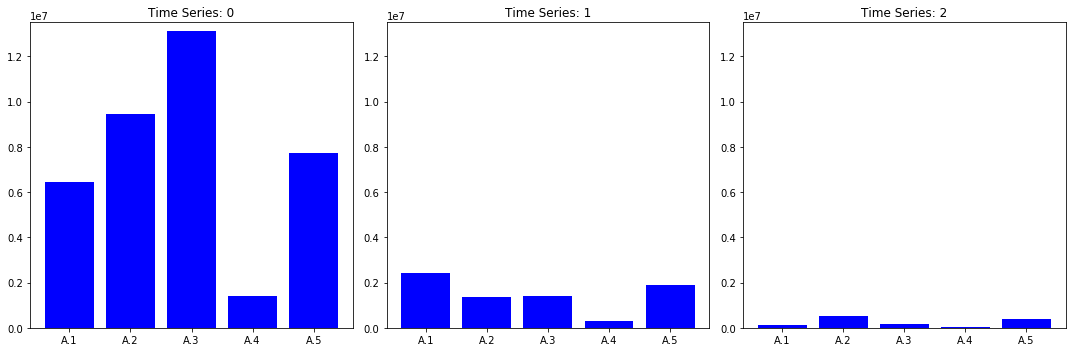

In [12]:
#mean value of expected annual damage of each dike per time serires

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    damage_list_75 = []
    base_damage_list = []
    base_damage_list_75 = []
    
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Annual Damage "+str(n)].mean())
        damage_list_75.append(results[str(i) + "_Expected Annual Damage "+str(n)].quantile(0.75))
    
    a.bar(dike_lists, damage_list, color = 'blue')
    a.set_ylim([0,13500000])
    
    print(damage_list)
    print('damage')
    print(base_damage_list)
    print('base_damage')
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()
#add line

[0.0012750345266271718, 0.0035686669008700195, 0.01042487868457414, 0.0002610925953773126, 0.0019213871799612571]
[0.000250434845880922, 0.0003808572897855057, 0.0012593737580152025, 8.140023669994364e-05, 0.0007311809816013604]
[1.5950474302302093e-05, 0.00012941416301134501, 0.00021771482125795808, 1.626068743359201e-05, 0.00012005089524439694]


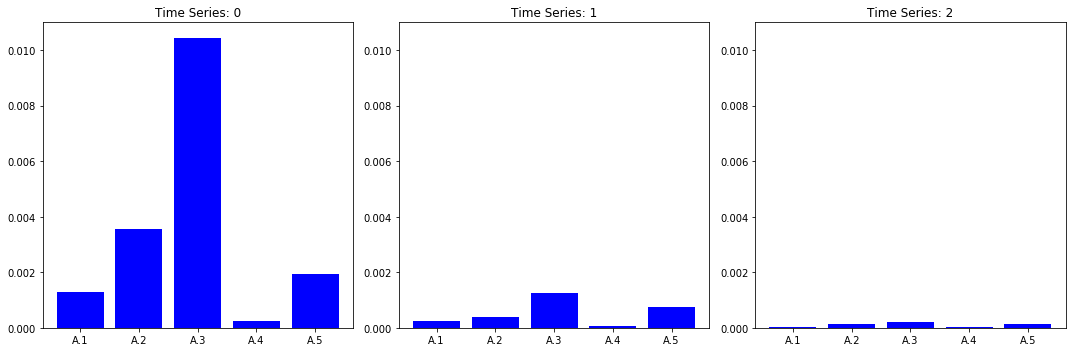

In [17]:
#mean value of Expected Number of Deaths of each dike per time serires

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for (n, a) in zip(range(3), axes.flatten()):    
    damage_list = []
    base_damage_list = []
    
    for i in dike_lists:
        damage_list.append(results[str(i) + "_Expected Number of Deaths "+str(n)].mean())
        
    damage = pd.DataFrame([damage_list], columns = ["dike1", "dike2", "dike3", "dike4", "dike5"])
    a.bar(dike_lists, damage_list, color = 'blue')
    a.set_ylim([0,0.011])
    print(damage_list)
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()


In [33]:
def mean(data):
    m = np.mean(data)
    return m

res_75 = pd.DataFrame(columns=["A.1_Expected Annual Damage 0", "A.1_Expected Number of Deaths 0", 
                               "A.2_Expected Annual Damage 0", "A.2_Expected Number of Deaths 0",
                               "A.3_Expected Annual Damage 0", "A.3_Expected Number of Deaths 0",
                               "A.4_Expected Annual Damage 0", "A.4_Expected Number of Deaths 0",
                               "A.5_Expected Annual Damage 0", "A.5_Expected Number of Deaths 0",
                               "A.1_Expected Annual Damage 1", "A.1_Expected Number of Deaths 1", 
                               "A.2_Expected Annual Damage 1", "A.2_Expected Number of Deaths 1",
                               "A.3_Expected Annual Damage 1", "A.3_Expected Number of Deaths 1",
                               "A.4_Expected Annual Damage 1", "A.4_Expected Number of Deaths 1",
                               "A.5_Expected Annual Damage 1", "A.5_Expected Number of Deaths 1",
                               "A.1_Expected Annual Damage 2", "A.1_Expected Number of Deaths 2", 
                               "A.2_Expected Annual Damage 2", "A.2_Expected Number of Deaths 2",
                               "A.3_Expected Annual Damage 2", "A.3_Expected Number of Deaths 2",
                               "A.4_Expected Annual Damage 2", "A.4_Expected Number of Deaths 2",
                               "A.5_Expected Annual Damage 2", "A.5_Expected Number of Deaths 2", "policy"])

for p in results["policy"].unique():
    result = []
    name = []
    index = results[results["policy"] == p].index
    
    for t in range(3):
        for i in dike_lists:

            result.append(mean(results[str(i) + "_Expected Annual Damage "+str(t)][index]))
            result.append(mean(results[str(i) + "_Expected Number of Deaths "+str(t)][index]))
            
            name.append(str(i) + "_Expected Annual Damage "+str(t))
            name.append(str(i) + "_Expected Number of Deaths "+str(t))

    name.append("policy")
    result.append(p)
    res_75 = res_75.append(pd.Series(result, index=name), ignore_index=True) 

    
res_75

,A.1_Expected Annual Damage 0,A.1_Expected Number of Deaths 0,A.2_Expected Annual Damage 0,A.2_Expected Number of Deaths 0,A.3_Expected Annual Damage 0,A.3_Expected Number of Deaths 0,A.4_Expected Annual Damage 0,A.4_Expected Number of Deaths 0,A.5_Expected Annual Damage 0,A.5_Expected Number of Deaths 0,...,A.1_Expected Number of Deaths 2,A.2_Expected Annual Damage 2,A.2_Expected Number of Deaths 2,A.3_Expected Annual Damage 2,A.3_Expected Number of Deaths 2,A.4_Expected Annual Damage 2,A.4_Expected Number of Deaths 2,A.5_Expected Annual Damage 2,A.5_Expected Number of Deaths 2,policy
0,2.458092e+06,0.000179,1.623792e+06,0.000179,3.784234e+07,0.007953,7.299509e+02,5.929005e-08,9.417811e+05,0.000113,...,0.000179,0.000000,0.000000,68762.254796,0.000014,0.000000,0.000000e+00,0.000000,0.000000,2.0
1,1.604679e+06,0.000325,1.934888e+04,0.000007,4.949993e+06,0.003339,1.536635e+06,2.815051e-04,4.602378e+06,0.001635,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,3.0
2,6.413605e+06,0.000488,8.574130e+06,0.000921,3.112992e+05,0.000073,1.457368e+07,8.391504e-04,8.020487e+06,0.000917,...,0.000000,407265.628628,0.000049,0.000000,0.000000,0.000000,0.000000e+00,644217.362645,0.000082,4.0
3,3.338504e+05,0.000027,1.757734e+04,0.000003,1.352340e+05,0.000041,1.046080e+06,7.438097e-05,1.121791e+07,0.001544,...,0.000000,0.000000,0.000000,0.000000,0.000000,99.742183,9.940852e-09,0.000000,0.000000,5.0
4,0.000000e+00,0.000000,2.738249e+06,0.000305,3.100474e+07,0.006647,4.215387e+05,2.482753e-05,1.283309e+05,0.000016,...,0.000000,0.000000,0.000000,9077.595962,0.000002,0.000000,0.000000e+00,11219.903246,0.000002,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,1.485239e+08,0.014630,1.123119e+07,0.001469,2.085717e+04,0.000006,4.468716e+06,2.961342e-04,3.025204e+07,0.004182,...,0.000227,15397.113835,0.000002,0.000000,0.000000,153846.735183,1.202899e-05,78365.886459,0.000014,72.0
71,1.770855e+07,0.011027,8.510031e+06,0.007616,8.650560e+06,0.015968,5.011741e+06,2.339826e-03,1.449471e+06,0.001399,...,0.000000,0.000000,0.000000,0.000000,0.000000,109171.233178,6.025855e-05,0.000000,0.000000,73.0
72,8.132793e+06,0.005119,1.307315e+06,0.001240,8.964948e+07,0.156921,2.924742e+05,1.456017e-04,8.850326e+05,0.000909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,74.0
73,1.285435e+07,0.000978,3.081805e+05,0.000036,3.765023e+07,0.007898,0.000000e+00,0.000000e+00,3.555546e+04,0.000004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,75.0


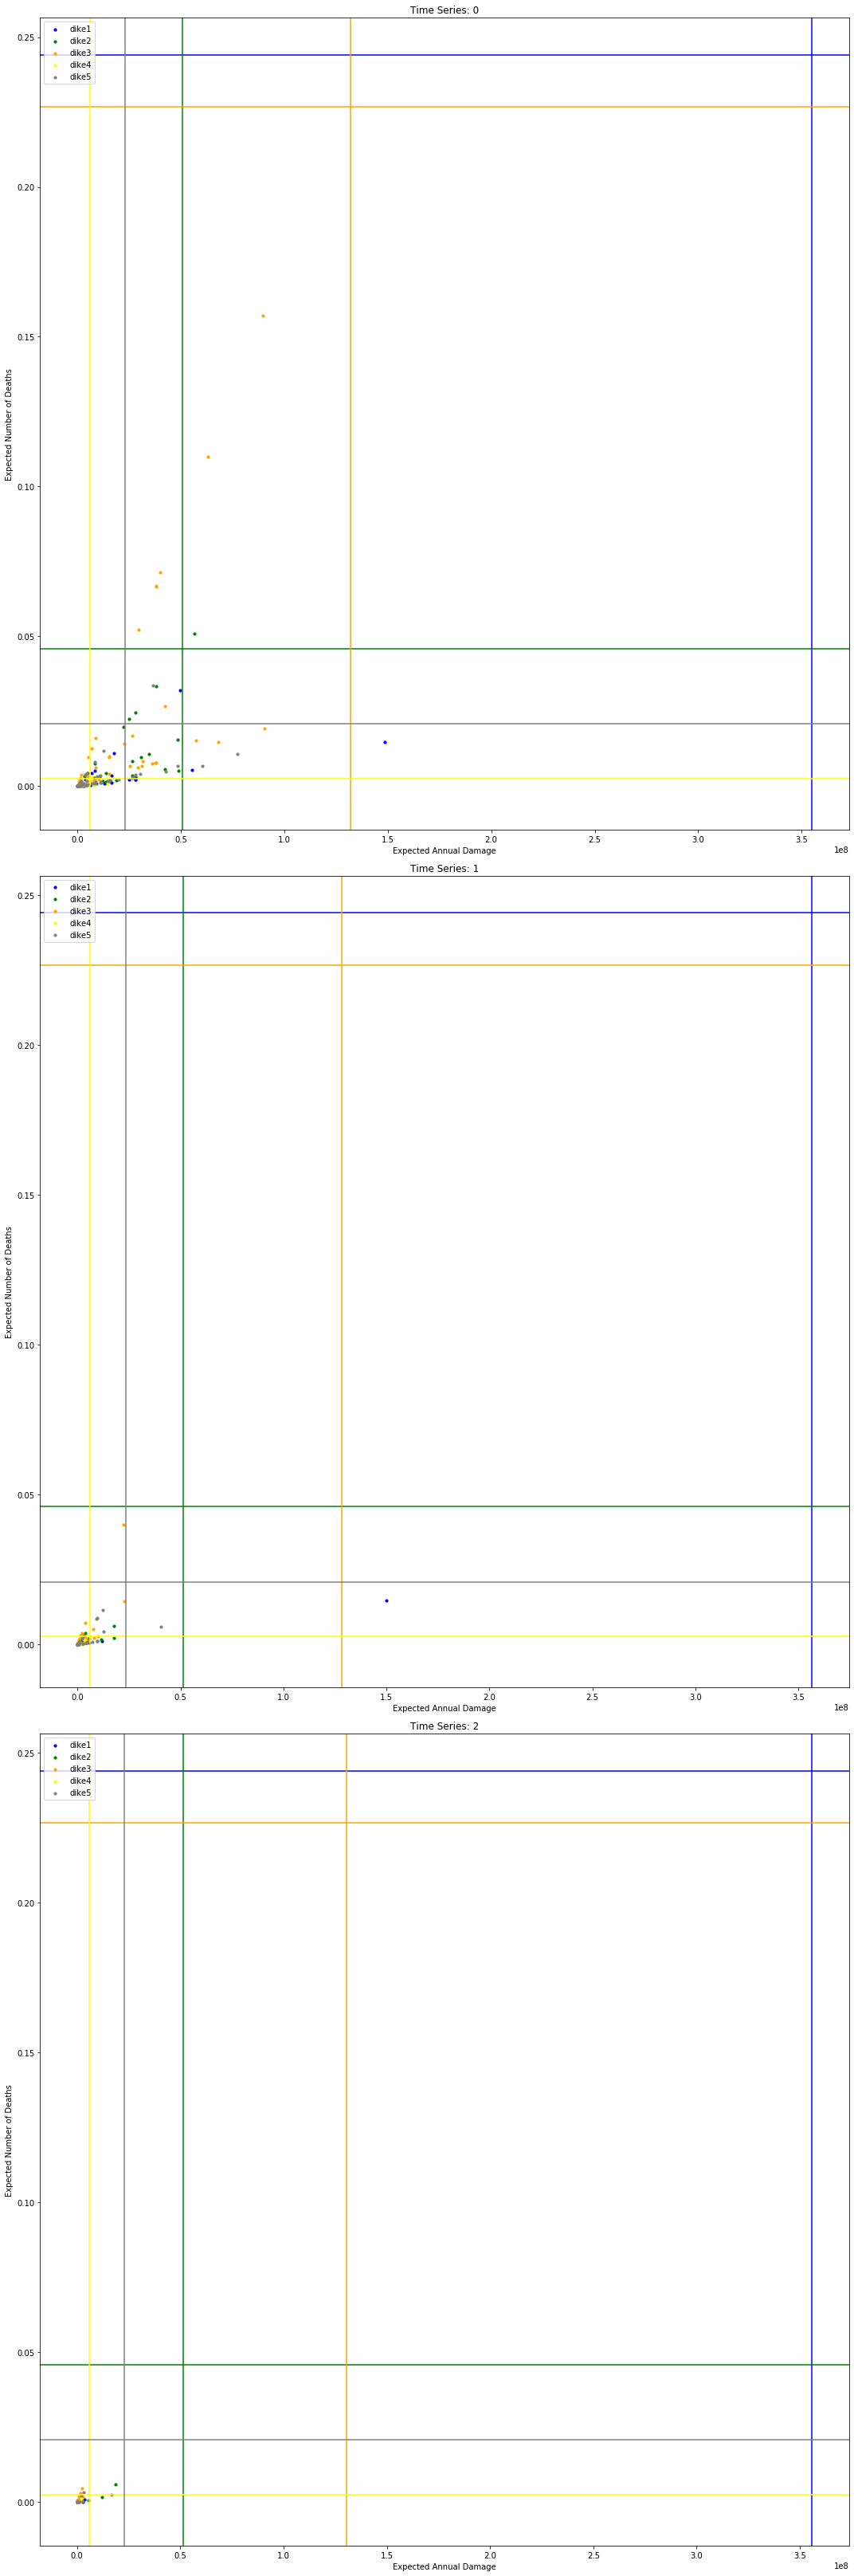

In [111]:
fig, axes = plt.subplots(3, 1, figsize=(15, 45))
for (n, a) in zip(range(3), axes):    
    damage_list = []
    base_damage_list = []
        
    a.scatter(res_75.iloc[:,10*n], res_75.iloc[:,10*n+1], s=10, c='b', marker="o", label='dike1')
    a.scatter(res_75.iloc[:,10*n+2], res_75.iloc[:,10*n+3], s=10, c='g', marker="o", label='dike2')
    a.scatter(res_75.iloc[:,10*n+4], res_75.iloc[:,10*n+5], s=10, c='orange', marker="o", label='dike3')
    a.scatter(res_75.iloc[:,10*n+6], res_75.iloc[:,10*n+7], s=10, c='yellow', marker="o", label='dike4')
    a.scatter(res_75.iloc[:,10*n+8], res_75.iloc[:,10*n+9], s=10, c='grey', marker="o", label='dike5')
    
    
    a.set_title("Time Series: "+str(n))
    a.legend(loc='upper left')
    a.axhline(y=base_deaths[n][0], color='blue')
    a.axvline(x=base_damage[n][0], color='blue')
    a.axhline(y=base_deaths[n][1], color='green')
    a.axvline(x=base_damage[n][1], color='green')
    a.axhline(y=base_deaths[n][2], color='orange')
    a.axvline(x=base_damage[n][2], color='orange')
    a.axhline(y=base_deaths[n][3], color='yellow')
    a.axvline(x=base_damage[n][3], color='yellow')
    a.axhline(y=base_deaths[n][4], color='grey')
    a.axvline(x=base_damage[n][4], color='grey')
    a.set_xlabel('Expected Annual Damage')
    a.set_ylabel('Expected Number of Deaths')
    
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


Time step:0


No handles with labels found to put in legend.


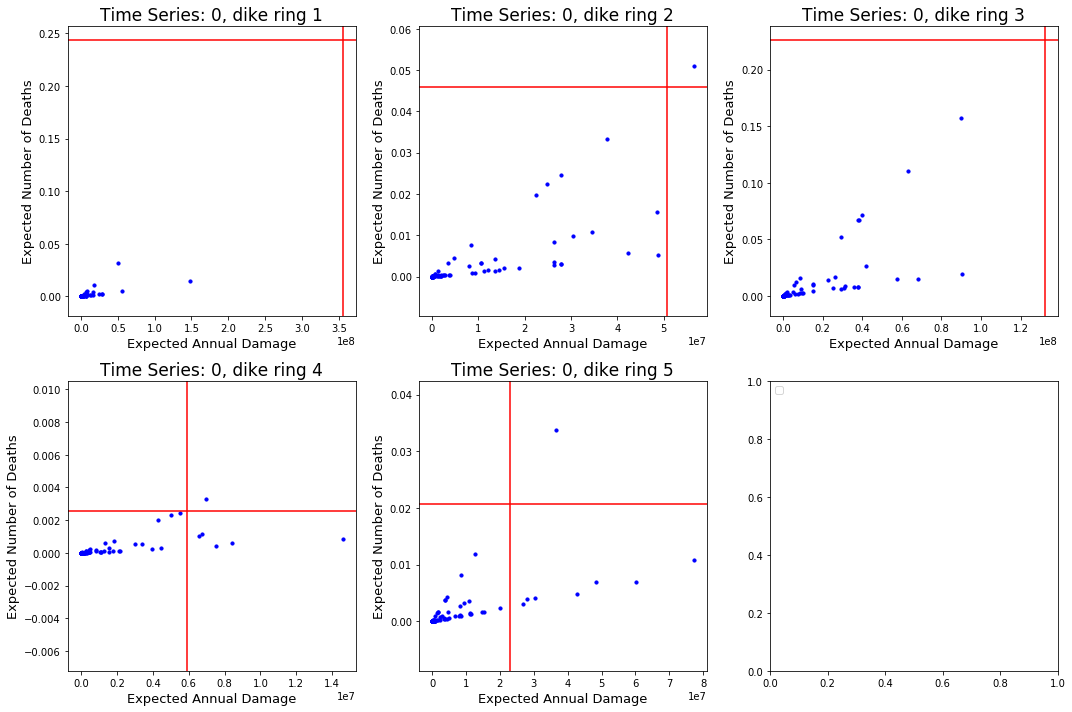

In [149]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

print("Time step:" + str(0))
for (i, a) in zip(range(5), axes.ravel()):
    a.scatter(res_75.iloc[:,2*i], res_75.iloc[:,2*i+1], s=10, c='b', marker="o", label='dike'+str(i+1))
    
#    x = res_75.iloc[:,2*i].tolist()
#    y = res_75.iloc[:,2*i+1].tolist()
#    name = res_75["policy"].tolist()
    
    a.set_title("Time Series: 0, dike ring "+str(i+1), fontsize=17)
#    a.legend(loc='upper left')
    a.axhline(y=base_deaths[0][i], color='red')
    a.axvline(x=base_damage[0][i], color='red')
    
#    for r in range(75):
#        a.annotate(name[r], (x[r],y[r]))
    a.set_xlabel('Expected Annual Damage', fontsize=13)
    a.set_ylabel('Expected Number of Deaths', fontsize=13)
    
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


Time step: 1


No handles with labels found to put in legend.


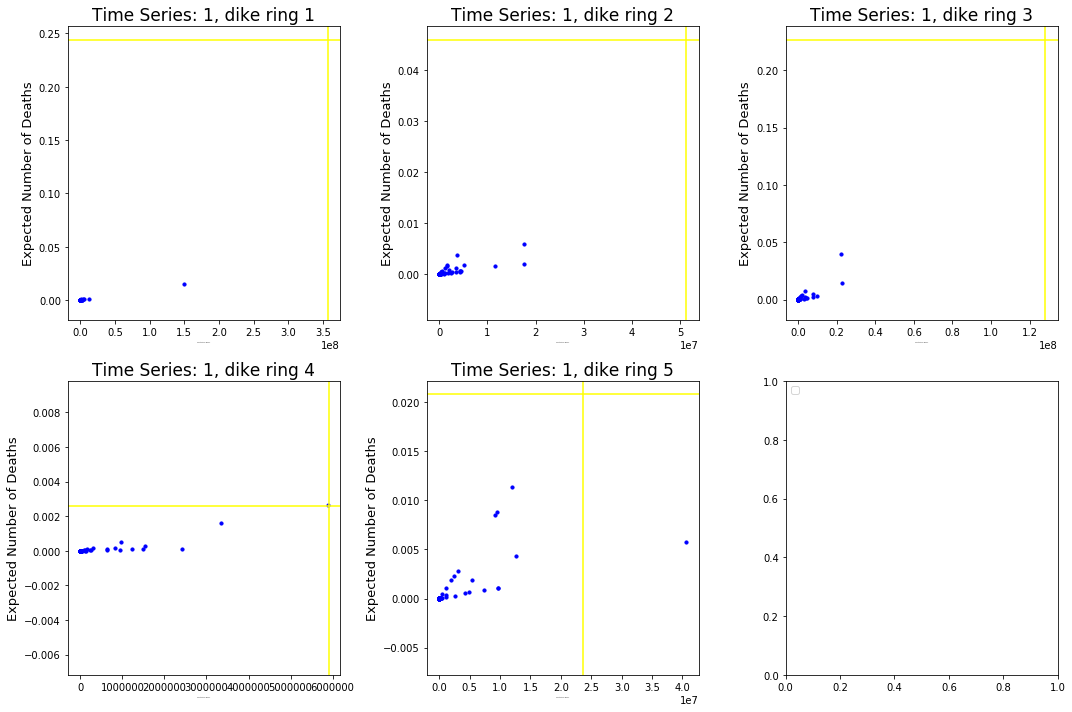

In [143]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

print("Time step: 1")
for (i, a) in zip(range(5), axes.ravel()):
    a.scatter(res_75.iloc[:,10+2*i], res_75.iloc[:,10+2*i+1], s=10, c='b', marker="o", label='dike'+str(i+1))
   
    name = res_75["policy"].tolist()
    a.set_title("Time Series: 1, dike ring "+str(i+1), fontsize=17)
#    a.legend(loc='upper left')

        
    a.axhline(y=base_deaths[1][i], color='yellow')
    a.axvline(x=base_damage[1][i], color='yellow')
    a.set_xlabel('Expected Annual Damage', fontsize=1)
    a.set_ylabel('Expected Number of Deaths', fontsize=13)
    
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


Time step: 2


No handles with labels found to put in legend.


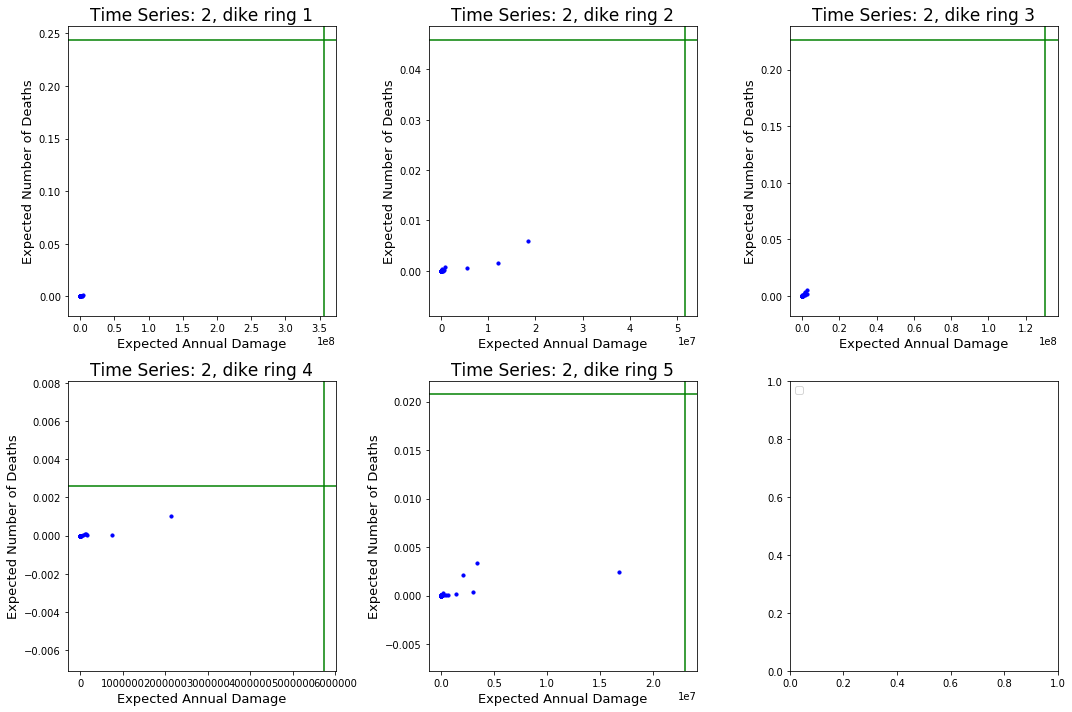

In [121]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

print("Time step: 2")
for (i, a) in zip(range(5), axes.ravel()):
    a.scatter(res_75.iloc[:,20+2*i], res_75.iloc[:,20+2*i+1], s=10, c='b', marker="o", label='dike'+str(i+1))
    
    a.set_title("Time Series: 2, dike ring "+str(i+1), fontsize=17)
#    a.legend(loc='upper left')
    a.axhline(y=base_deaths[2][i], color='green')
    a.axvline(x=base_damage[2][i], color='green')
    a.set_xlabel('Expected Annual Damage', fontsize=13)
    a.set_ylabel('Expected Number of Deaths', fontsize=13)
    
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


In [20]:
#total demage calculate
damage_column=[]
death_column=[]
investment_column=[]
rfr_column = []
evacuation_column = []

for c in outcomes.columns:
    if "Expected Annual Damage" in c:
        damage_column.append(c)

for c in outcomes.columns:
    if "Expected Number of Deaths" in c:
        death_column.append(c)
        
for c in outcomes.columns:
    if "Dike Investment Costs" in c:
        investment_column.append(c)
        
for c in outcomes.columns:
    if "RfR Total Costs" in c:
        rfr_column.append(c)
        
for c in outcomes.columns:
    if "Expected Evacuation Costs" in c:
        evacuation_column.append(c)

outcomes["Total Expected Annual Damage"] = outcomes[damage_column].sum(axis=1)
outcomes["Total Expected Number of Deaths"] = outcomes[death_column].sum(axis=1)
outcomes["Total Dike Investment Costs"] = outcomes[investment_column].sum(axis=1)
outcomes["Total RfR Total Costs"] = outcomes[rfr_column].sum(axis=1)
outcomes["Total Expected Evacuation Costs"] = outcomes[evacuation_column].sum(axis=1)


In [26]:
results_new = experiments.join(outcomes)
results_new = results_new.drop(columns="model")
results_new

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_Expected Annual Damage 2,A.5_Dike Investment Costs 2,A.5_Expected Number of Deaths 2,RfR Total Costs 2,Expected Evacuation Costs 2,Total Expected Annual Damage,Total Expected Number of Deaths,Total Dike Investment Costs,Total RfR Total Costs,Total Expected Evacuation Costs
0,22.0,316.720229,1.5,0.508918,179.556360,1.0,0.056675,161.786225,1.0,0.411000,...,0.0,9.630148e+07,0.0,492600000.0,0.000000,1.704003e+07,0.002139,5.571625e+08,1.069800e+09,737.296215
1,37.0,48.449390,1.5,0.726517,71.388513,1.0,0.316716,140.869331,10.0,0.288527,...,0.0,9.630148e+07,0.0,492600000.0,0.000000,2.788806e+07,0.004377,5.571625e+08,1.069800e+09,1125.312347
2,116.0,342.466577,1.5,0.696968,164.240184,10.0,0.070253,241.641985,10.0,0.701739,...,0.0,9.630148e+07,0.0,492600000.0,0.000000,3.106400e+06,0.000434,5.571625e+08,1.069800e+09,240.005210
3,131.0,317.750054,10.0,0.514734,41.084696,10.0,0.670645,172.060501,1.5,0.002929,...,0.0,9.630148e+07,0.0,492600000.0,568.536776,6.589090e+08,0.125879,5.571625e+08,1.069800e+09,38728.384144
4,69.0,134.031006,1.0,0.056991,141.114722,10.0,0.138095,275.399627,1.0,0.807559,...,0.0,9.630148e+07,0.0,492600000.0,0.000000,1.957596e+07,0.003175,5.571625e+08,1.069800e+09,2151.356713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,23.0,151.955766,10.0,0.943525,149.089915,1.5,0.594206,270.182770,1.5,0.089715,...,0.0,5.525012e+07,0.0,679700000.0,0.000000,1.040420e+08,0.019924,7.619611e+08,1.474700e+09,5788.122696
74996,39.0,224.496227,1.0,0.390712,243.949795,1.0,0.090980,310.542851,1.5,0.569246,...,0.0,5.525012e+07,0.0,679700000.0,0.000000,8.310638e+07,0.008613,7.619611e+08,1.474700e+09,5271.800704
74997,45.0,347.284444,1.0,0.687342,59.820104,1.0,0.659417,229.083131,1.0,0.643934,...,0.0,5.525012e+07,0.0,679700000.0,0.000000,3.193923e+06,0.000458,7.619611e+08,1.474700e+09,244.787029
74998,124.0,106.585076,1.0,0.434781,132.822331,10.0,0.266128,170.757239,10.0,0.151776,...,0.0,5.525012e+07,0.0,679700000.0,0.000000,5.805561e+07,0.007140,7.619611e+08,1.474700e+09,2567.922822


In [22]:
outcomes.to_csv('results/75policies_with_total_values.csv', index = False)

In [27]:
total_damage_75 = results_new["Total Expected Annual Damage"].quantile(0.75)
total_death_75 = results_new["Total Expected Number of Deaths"].quantile(0.75)

x = results_new.iloc[:, :19]  # Only take the uncertainties

y_deaths = results_new['Total Expected Number of Deaths'].values
y_deaths = y_deaths > total_death_75

[MainProcess/INFO] 75000 points remaining, containing 18750 cases of interest
[MainProcess/INFO] mean: 0.5849382716049383, mass: 0.054, coverage: 0.12634666666666666, density: 0.5849382716049383 restricted_dimensions: 3


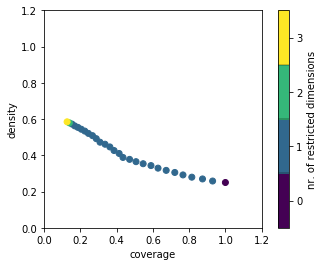

In [34]:
prim_alg = prim.Prim(x, y_deaths, threshold=0.5, peel_alpha=0.1)
box1 = prim_alg.find_box()

box1.show_tradeoff()
plt.show()

In [35]:
box1.peeling_trajectory

,coverage,density,id,mass,mean,res_dim
0,1.000000,0.250000,0,1.000,0.250000,0
1,0.929387,0.258163,1,0.900,0.258163,1
2,0.873653,0.269646,2,0.810,0.269646,1
3,0.814667,0.279378,3,0.729,0.279378,1
4,0.765813,0.291850,4,0.656,0.291850,1
5,0.720747,0.305401,5,0.590,0.305401,1
6,0.673173,0.316937,6,0.531,0.316937,1
7,0.628160,0.329224,7,0.477,0.329224,1
8,0.589333,0.343434,8,0.429,0.343434,1
9,0.546027,0.353644,9,0.386,0.353644,1


coverage    0.126347
density     0.584938
id                27
mass           0.054
mean        0.584938
res_dim            3
Name: 27, dtype: object

              box 27                                        
                 min         max                   qp values
A.3_pfail   0.000523    0.067020                 [-1.0, 0.0]
A.5_Bmax   30.279606  324.284536  [-1.0, 0.2312209975689884]
A.1_Bmax   76.788776  349.901186  [0.1585695749005066, -1.0]



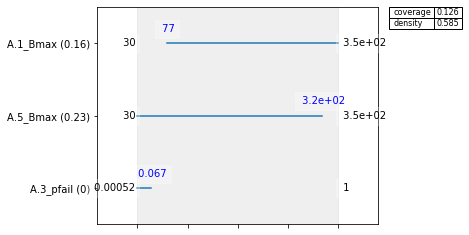

In [36]:
box1.inspect()
box1.inspect(style='graph')
plt.show()

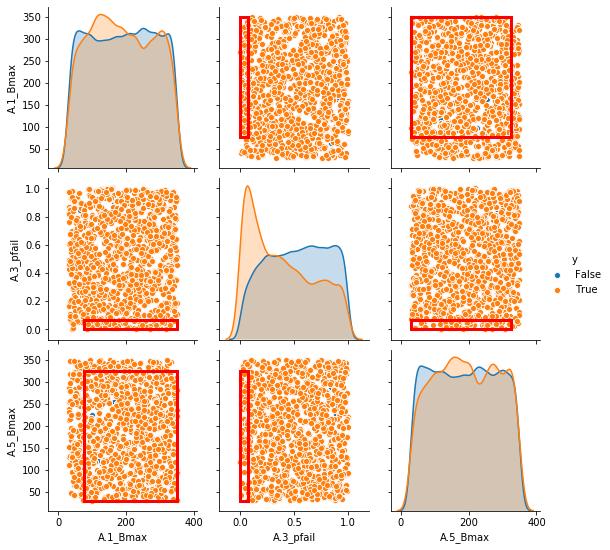

In [37]:
box1.select(-1)
box1.show_pairs_scatter()
plt.show()

In [45]:
experiments_25, outcomes_25 = utilities.load_results('results/base_case_25.csv')
outcomes_25 = pd.DataFrame(outcomes_25)
outcomes_25

[MainProcess/INFO] results loaded succesfully from C:\Users\na0e2\Documents\EPA1361\epa1361_open-master\final assignment\results\base_case_25.csv


,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,1.276686e+08,7.242345e+08,1.305500e+09,2261.612172,0.057127
1,3.376730e+06,7.242345e+08,1.305500e+09,85.845296,0.001151
2,4.401415e+08,7.242345e+08,1.305500e+09,10644.762897,0.249753
3,3.714329e+07,7.242345e+08,1.305500e+09,1126.394452,0.011669
4,7.810257e+06,7.242345e+08,1.305500e+09,355.878927,0.003826
...,...,...,...,...,...
24995,4.096309e+06,6.434561e+08,1.086000e+09,179.241920,0.001343
24996,1.108645e+07,6.434561e+08,1.086000e+09,387.834583,0.002887
24997,0.000000e+00,6.434561e+08,1.086000e+09,0.000000,0.000000
24998,2.832309e+07,6.434561e+08,1.086000e+09,1646.307985,0.001681


In [46]:

outcomes_25 = pd.DataFrame(outcomes_25)
experiments_25 = pd.DataFrame(experiments_25)

results = experiments_25.join(outcomes_25)
results = results.drop(columns="model")


In [51]:
results

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,72.0,229.065066,1.0,0.046967,223.668730,1.0,0.959957,313.581649,1.0,0.094915,...,8.0,7.0,1.0,1000,0,1.276686e+08,7.242345e+08,1.305500e+09,2261.612172,0.057127
1,116.0,33.749286,1.0,0.315966,325.813725,10.0,0.002073,337.906842,1.5,0.902318,...,8.0,7.0,1.0,1001,0,3.376730e+06,7.242345e+08,1.305500e+09,85.845296,0.001151
2,89.0,154.258454,10.0,0.579020,210.092981,10.0,0.295155,68.942692,1.0,0.034387,...,8.0,7.0,1.0,1002,0,4.401415e+08,7.242345e+08,1.305500e+09,10644.762897,0.249753
3,62.0,192.404949,1.5,0.537800,153.666509,10.0,0.327101,253.606447,1.0,0.792516,...,8.0,7.0,1.0,1003,0,3.714329e+07,7.242345e+08,1.305500e+09,1126.394452,0.011669
4,19.0,206.441001,10.0,0.738176,52.302399,1.0,0.264023,224.214285,1.0,0.769407,...,8.0,7.0,1.0,1004,0,7.810257e+06,7.242345e+08,1.305500e+09,355.878927,0.003826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4.0,290.080042,1.0,0.405025,122.982257,10.0,0.914892,111.896810,1.5,0.272958,...,8.0,1.0,2.0,1995,24,4.096309e+06,6.434561e+08,1.086000e+09,179.241920,0.001343
24996,65.0,106.054469,1.5,0.961497,185.190144,1.5,0.017885,277.261505,1.5,0.230139,...,8.0,1.0,2.0,1996,24,1.108645e+07,6.434561e+08,1.086000e+09,387.834583,0.002887
24997,6.0,74.906684,1.0,0.859558,278.084608,10.0,0.680525,78.511368,1.5,0.581816,...,8.0,1.0,2.0,1997,24,0.000000e+00,6.434561e+08,1.086000e+09,0.000000,0.000000
24998,53.0,127.422450,1.5,0.664705,330.008863,1.5,0.120276,311.819030,1.0,0.610247,...,8.0,1.0,2.0,1998,24,2.832309e+07,6.434561e+08,1.086000e+09,1646.307985,0.001681


In [74]:
def mean(data):
    m = np.mean(data)
    return m

res_25 = pd.DataFrame(columns=["policy", "dike", "rfr", "evac", "death", "damage"])

d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
for p in results["policy"].unique():
    result = []
    index = results[results["policy"] == p].index
    
    dike = mean(results["Dike Investment Costs"][index])
    rfr = mean(results["RfR Investment Costs"][index])
    evac = mean(results["Evacuation Costs"][index])
    death = mean(results["Expected Number of Deaths"][index])
    damage = mean(results["Expected Annual Damage"][index])
        
    result = [str(p), dike, rfr, evac, death, damage]
    
    res_25 = res_25.append(pd.Series(result, index=["policy", "dike", "rfr", "evac", "death", "damage"]), ignore_index=True) 

    
res_25

,policy,dike,rfr,evac,death,damage
0,0,7.242345e+08,1.305500e+09,1269.270510,0.029928,5.573015e+07
1,1,7.619251e+08,3.390000e+08,0.000000,0.068423,1.019914e+08
2,2,8.354878e+08,1.324200e+09,42.685357,0.001063,1.653031e+06
3,3,9.939158e+08,1.488100e+09,28.564324,0.000333,1.024586e+06
4,4,5.522342e+08,7.470000e+08,3344.290740,0.070838,1.664210e+08
5,5,7.909739e+08,1.215000e+09,4112.701480,0.005670,5.085952e+07
6,6,5.578211e+08,5.233000e+08,3457.924282,0.009756,9.857459e+07
7,7,6.169686e+08,1.172300e+09,209.711689,0.000546,3.277290e+06
8,8,4.181120e+08,1.233700e+09,2434.655176,0.005924,6.482586e+07
9,9,7.749016e+08,9.589000e+08,2074.221516,0.005473,4.081067e+07


[[682319445.1184062], [1075944000.0], [0.025485456756767794], [49669274.54619231]]
[[682319445.1184062, 682319445.1184062], [1075944000.0, 1075944000.0], [0.025485456756767794, 0.025485456756767794], [49669274.54619231, 49669274.54619231]]
[[682319445.1184062, 682319445.1184062, 682319445.1184062], [1075944000.0, 1075944000.0, 1075944000.0], [0.025485456756767794, 0.025485456756767794, 0.025485456756767794], [49669274.54619231, 49669274.54619231, 49669274.54619231]]
[[682319445.1184062, 682319445.1184062, 682319445.1184062, 682319445.1184062], [1075944000.0, 1075944000.0, 1075944000.0, 1075944000.0], [0.025485456756767794, 0.025485456756767794, 0.025485456756767794, 0.025485456756767794], [49669274.54619231, 49669274.54619231, 49669274.54619231, 49669274.54619231]]
[[682319445.1184062, 682319445.1184062, 682319445.1184062, 682319445.1184062, 682319445.1184062], [1075944000.0, 1075944000.0, 1075944000.0, 1075944000.0, 1075944000.0], [0.025485456756767794, 0.025485456756767794, 0.0254854

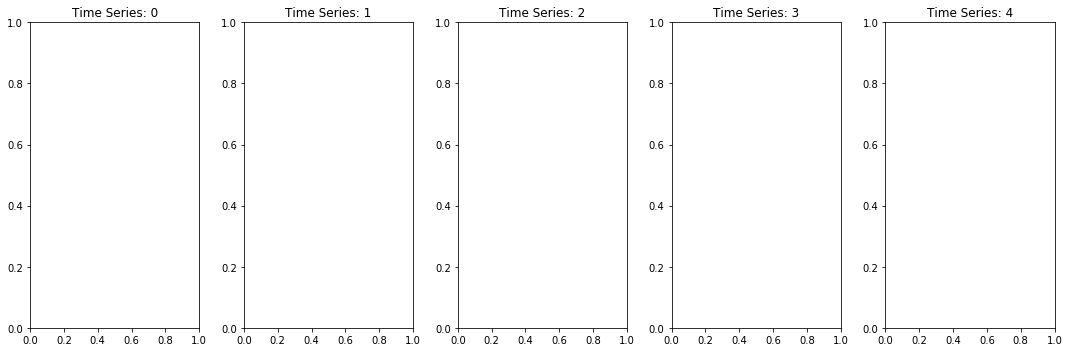

In [66]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
dike_lists = ['A.1', 'A.2', 'A.3', 'A.4']
for (n, a) in zip(, axes.flatten()):    
    d1 = []
    d2 = []
    d3 = []
    d4 = []
    d5 = []
    for p in range():
        d1.append(results["Dike Investment Costs"].mean())
        d2.append(results["RfR Investment Costs"].mean())
        #d3.append(results["Evacuation Cost"].mean())
        d4.append(results["Expected Number of Deaths"].mean())
        d5.append(results["Expected Annual Damage"].mean())
        result = [d1, d2, d4, d5]
    
        print(result)
     #   a.bar(dike_lists, result, color = (0.5,0.1,0.5,0.6))
    
    a.set_title("Time Series: "+str(n))
    
plt.tight_layout()
plt.show()